In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib as mpl
from PIL import Image
import numpy as np
mpl.rcParams['font.sans-serif'] = ['SimHei']  # 中文
plt.rcParams['axes.unicode_minus'] = False    # 正负号

# 数据读取

In [2]:
import os

In [3]:
m_path = './cloud/'
w_path = './forest/'

In [4]:
m_name = os.listdir(m_path)
w_name = os.listdir(w_path)

<Figure size 432x288 with 0 Axes>

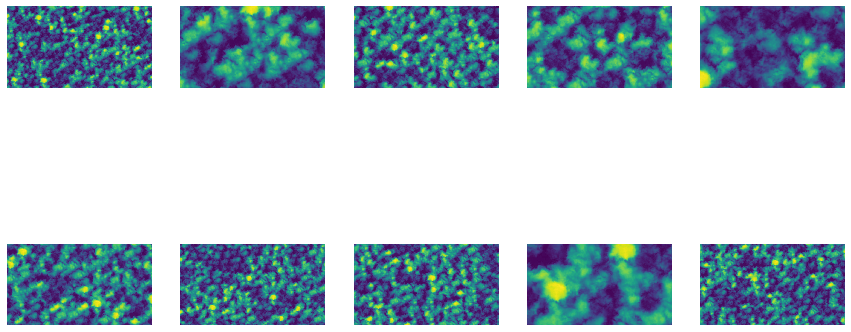

In [5]:
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.00001)
plt.figure(figsize=(15, 8))
for n, i in enumerate(m_name):
    plt.subplot(2, 5, n+1)
    img = Image.open(m_path+i)
    img = img.convert('L')
    plt.imshow(img)
    plt.axis('off')

<Figure size 432x288 with 0 Axes>

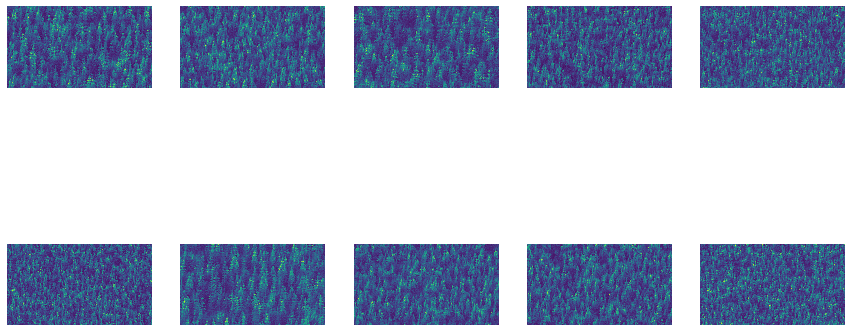

In [6]:
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.00001)
plt.figure(figsize=(15, 8))
for n, i in enumerate(w_name):
    plt.subplot(2, 5, n+1)
    img = Image.open(w_path+i)
    img = img.convert('L')
    plt.imshow(img)
    plt.axis('off')

# 空间灰度共生矩阵

以0度为例

In [7]:
def get_glm(img):   # 获取灰度共生矩阵
    res = np.zeros(img.shape)
    t = 0
    for i in img:
        for q, j in enumerate(i):
            if q+1 != len(i):
                m, n = i[q] -1, i[q+1] -1
                res[m][n] += 1
                t += 1
    return res

<Figure size 432x288 with 0 Axes>

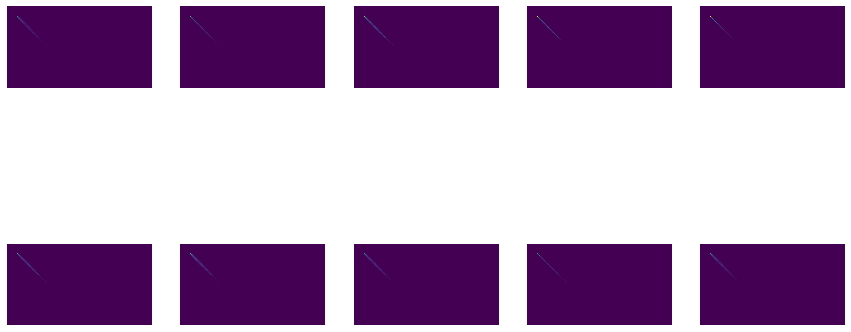

In [8]:
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.00001)
plt.figure(figsize=(15, 8))
for n, i in enumerate(m_name):
    plt.subplot(2, 5, n+1)
    img = Image.open(m_path+i)
    img = img.convert('L')    #转为灰度图
    img = np.array(img)
    res = get_glm(img)
    plt.imshow(res)
    plt.axis('off')

<Figure size 432x288 with 0 Axes>

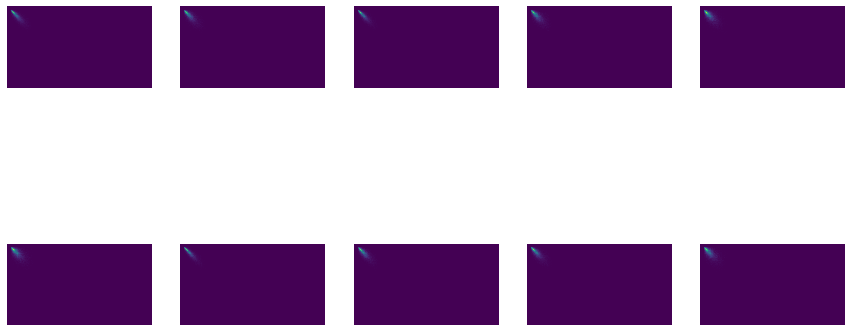

In [9]:
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.00001)
plt.figure(figsize=(15, 8))
for n, i in enumerate(w_name):
    plt.subplot(2, 5, n+1)
    img = Image.open(w_path+i)
    img = img.convert('L')    #转为灰度图
    img = np.array(img)
    res = get_glm(img)
    plt.imshow(res)
    plt.axis('off')

# 局部二值模式特征

In [10]:
def get_lbp(img):   # 获取灰度共生矩阵
    res = np.zeros((256,))
    get_area = lambda x, y:[[x+i, y+j] for i in [-1, 0, 1] for j in [-1, 0, 1] if not i == j == 0]
    index = [0, 1, 2, 4, 7, 6, 5, 3]
    for p,i in enumerate(img):
        if p not in [0, img.shape[0]-1]:
            for q, j in enumerate(i):
                if q not in [0, img.shape[1]-1]:
                    area = get_area(p, q)
                    area = [area[x] for x in index]
                    x = ''
                    for n in area:
                        if img[n[0]][n[1]] > img[p][q]:
                            x += '1'
                        else:
                            x += '0'
                    res[int(x, 2)] += 1
    return res

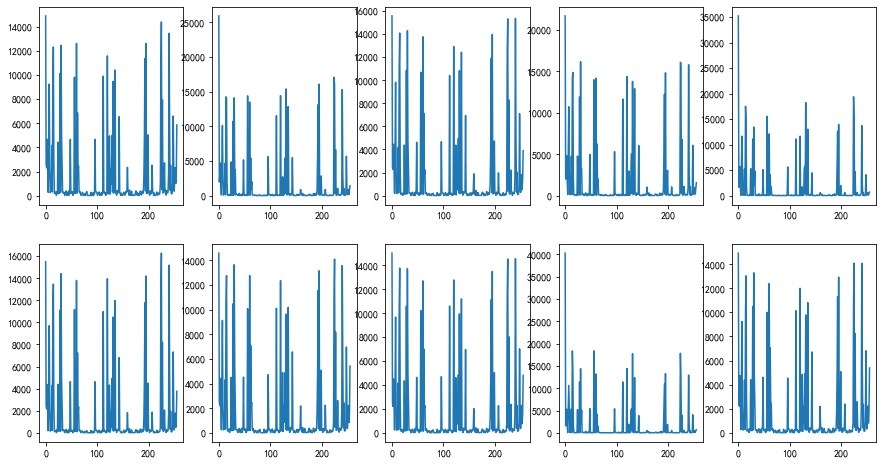

In [11]:
plt.figure(figsize=(15, 8))
for n, i in enumerate(m_name):
    plt.subplot(2, 5, n+1)
    img = Image.open(m_path+i)
    img = img.convert('L')    #转为灰度图
    img = np.array(img)
    res = get_lbp(img)
    plt.plot(res)

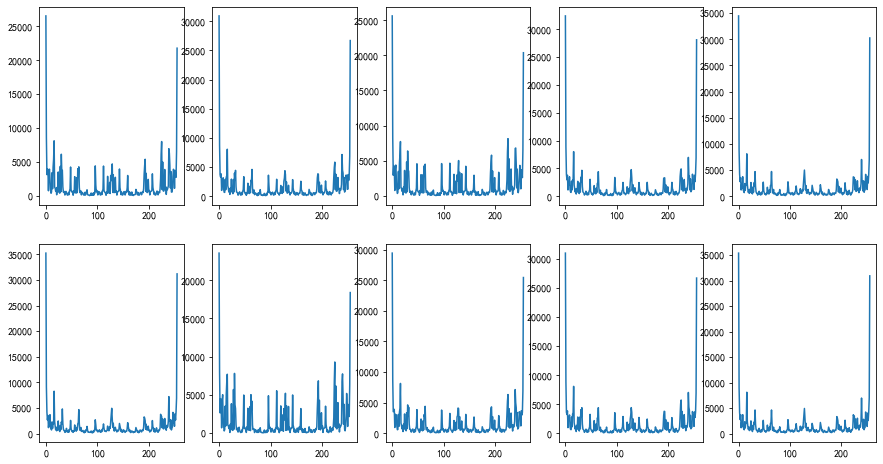

In [12]:
plt.figure(figsize=(15, 8))
for n, i in enumerate(w_name):
    plt.subplot(2, 5, n+1)
    img = Image.open(w_path+i)
    img = img.convert('L')    #转为灰度图
    img = np.array(img)
    res = get_lbp(img)
    plt.plot(res)